In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import io
import warnings 
warnings.filterwarnings( "ignore")

### Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### Data Dictionary

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

#### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
df=pd.read_excel("Election_Data.xlsx").drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.isnull()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1520,False,False,False,False,False,False,False,False,False
1521,False,False,False,False,False,False,False,False,False
1522,False,False,False,False,False,False,False,False,False
1523,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
df[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [9]:
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [10]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [11]:
df.shape

(1517, 9)

In [12]:
df["gender"].value_counts()

female    808
male      709
Name: gender, dtype: int64

In [13]:
df["vote"].value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [14]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

#### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [15]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='red');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Distribution of economic.cond.national
----------------------------------------------------------------------------


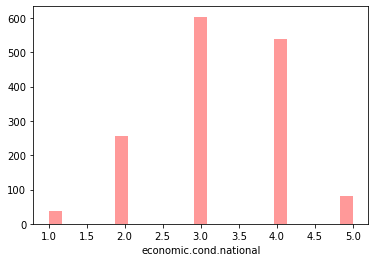

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


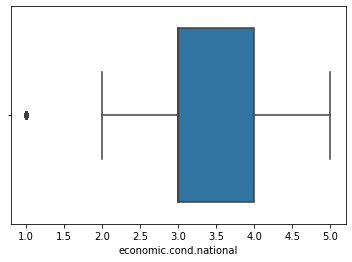

In [16]:
univariateAnalysis_numeric('economic.cond.national',2)

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Distribution of economic.cond.household
----------------------------------------------------------------------------


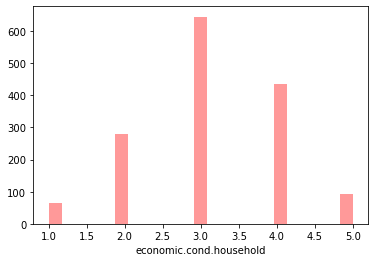

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


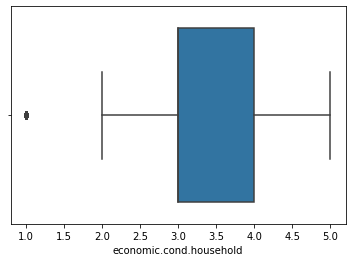

In [17]:
univariateAnalysis_numeric('economic.cond.household',2)

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------


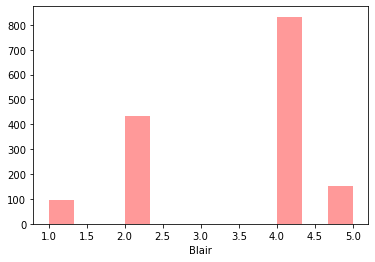

BoxPlot of Blair
----------------------------------------------------------------------------


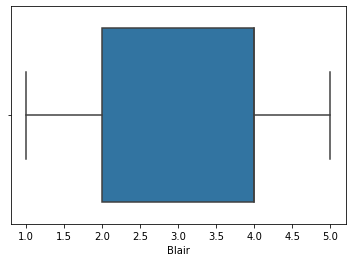

In [18]:
univariateAnalysis_numeric('Blair',2)

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------


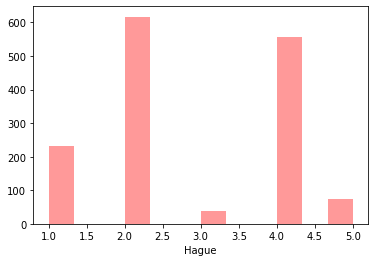

BoxPlot of Hague
----------------------------------------------------------------------------


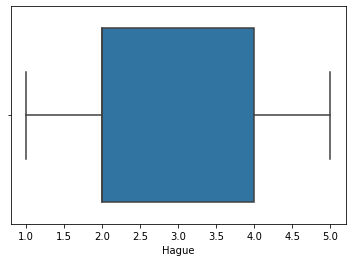

In [19]:
univariateAnalysis_numeric('Hague',2)

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------


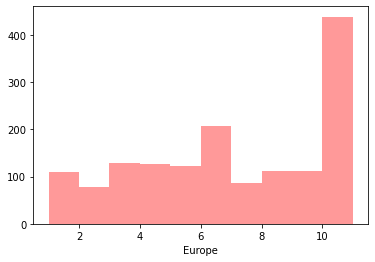

BoxPlot of Europe
----------------------------------------------------------------------------


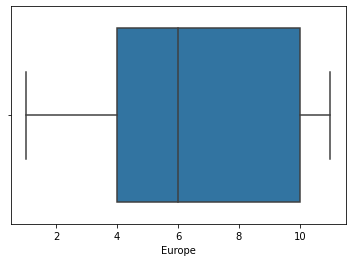

In [20]:
univariateAnalysis_numeric('Europe',2)

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Distribution of political.knowledge
----------------------------------------------------------------------------


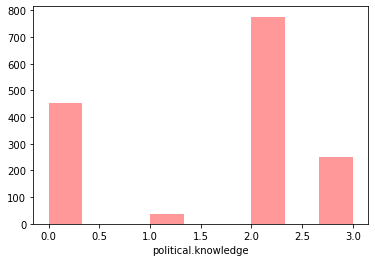

BoxPlot of political.knowledge
----------------------------------------------------------------------------


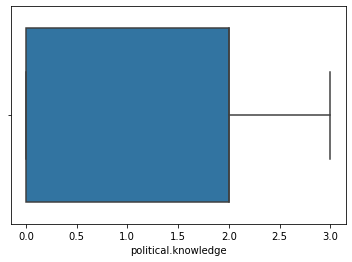

In [21]:
univariateAnalysis_numeric('political.knowledge',2)

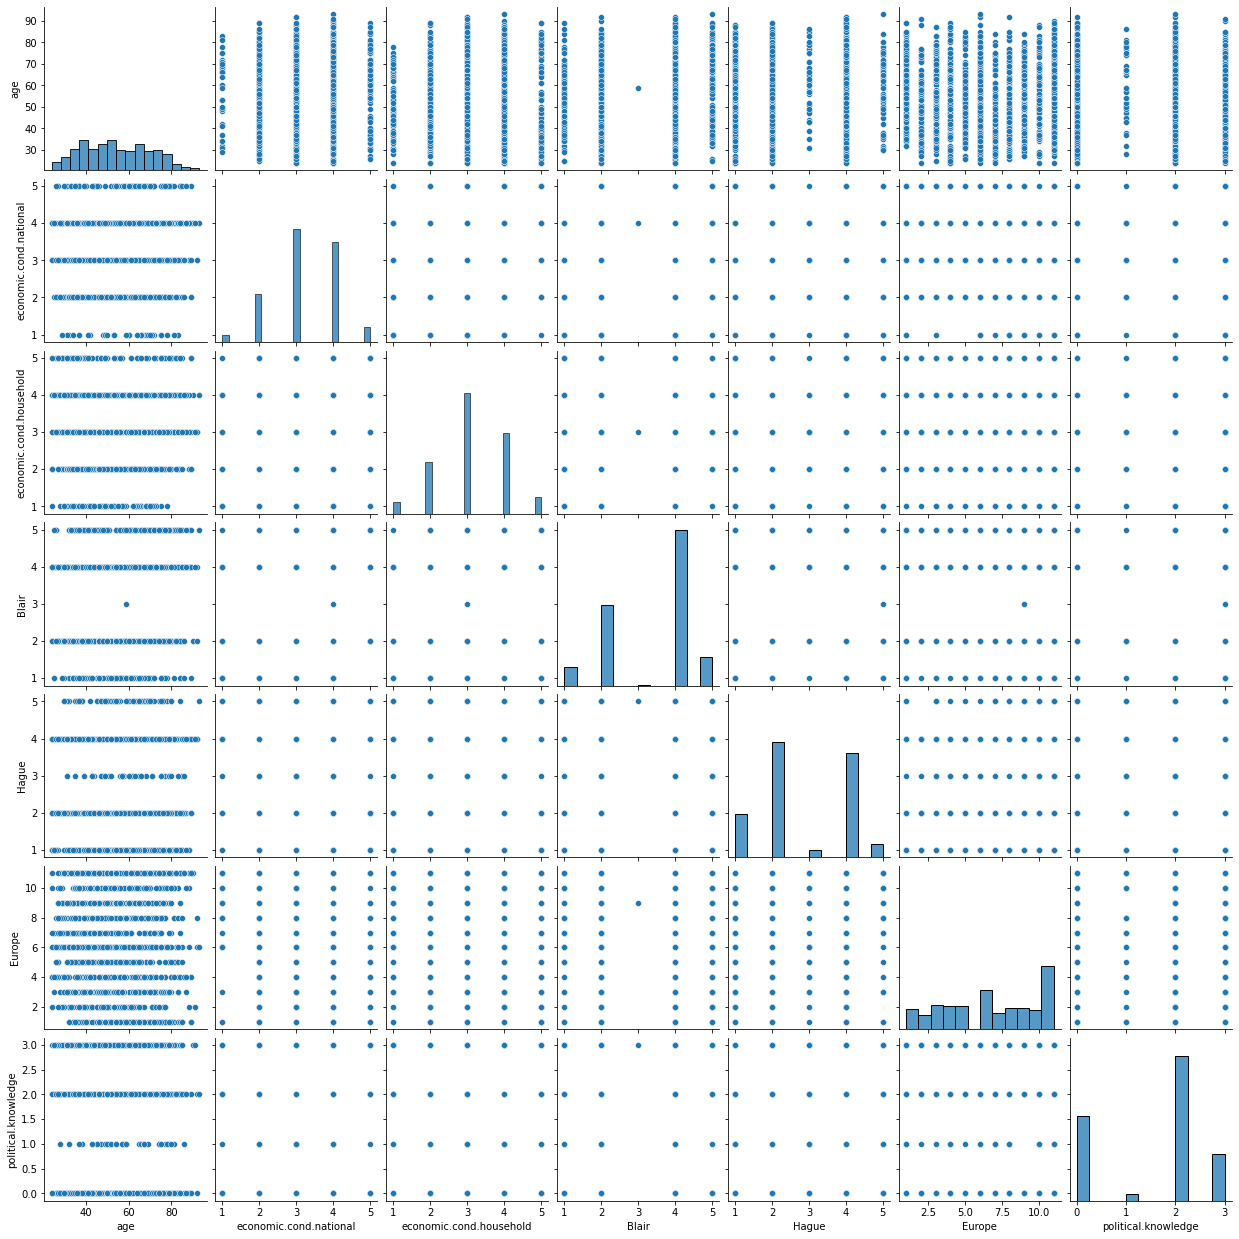

In [22]:
sns.pairplot(df)

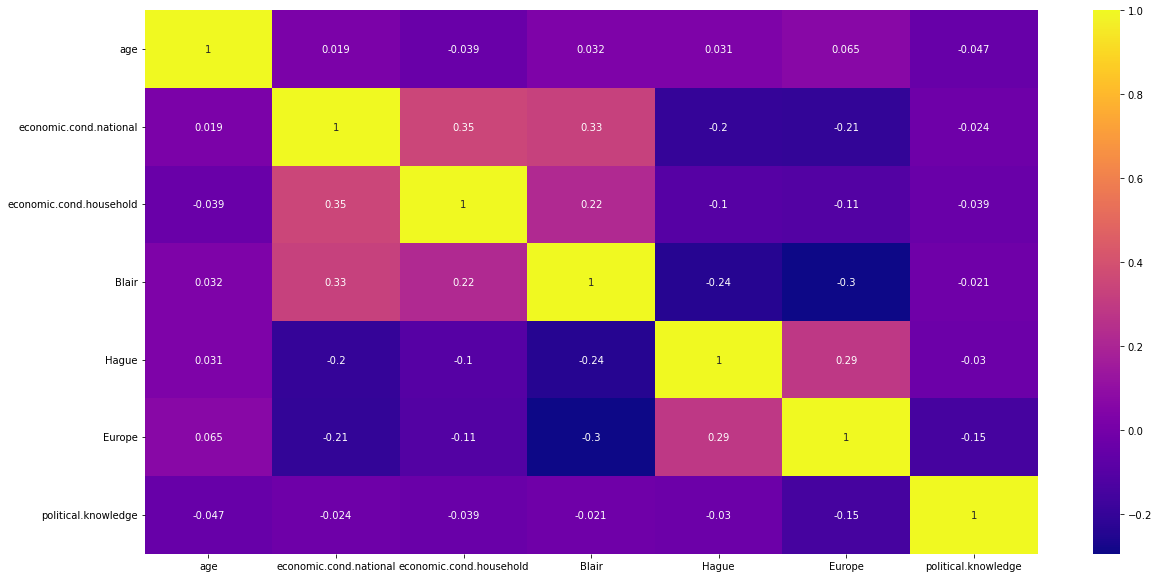

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap = 'plasma')
plt.show()

<AxesSubplot:xlabel='Blair', ylabel='age'>

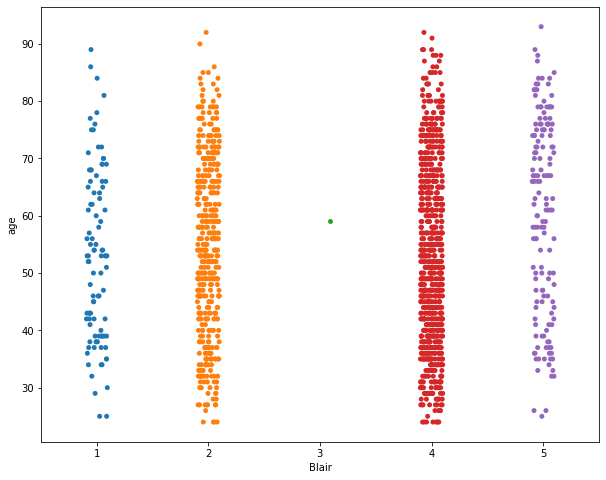

In [24]:
plt.figure(figsize = (10,8))
sns.stripplot(x=df["Blair"], y=df["age"])

<AxesSubplot:xlabel='Hague', ylabel='age'>

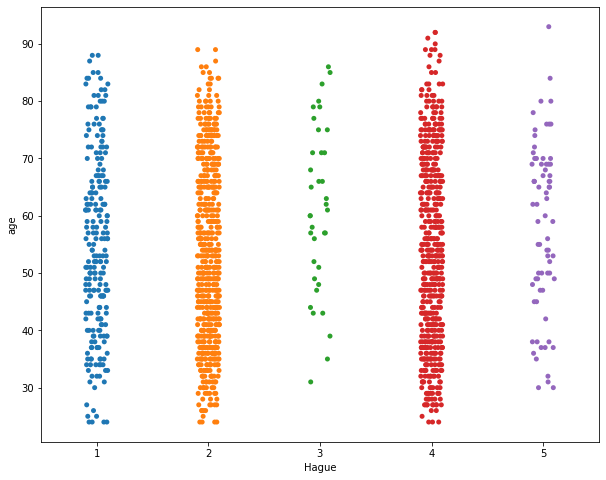

In [25]:
plt.figure(figsize = (10,8))
sns.stripplot(x=df["Hague"], y=df["age"])

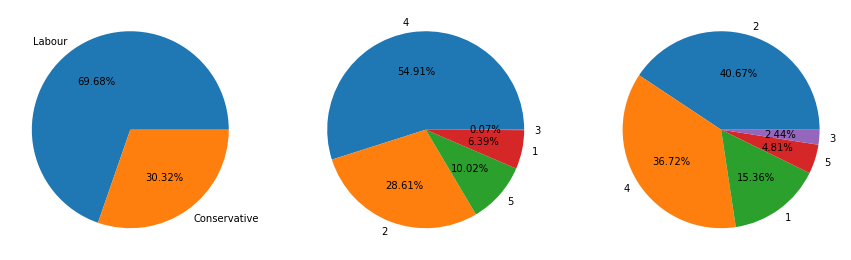

In [26]:
plt.figure(figsize = (15,10))
plt.subplot(131)
plt.pie(x = df['vote'].value_counts(),labels = df['vote'].value_counts().index,autopct = '%1.2f%%')

plt.subplot(132)
plt.pie(x = df['Blair'].value_counts(),labels = df['Blair'].value_counts().index,autopct = '%1.2f%%')

plt.subplot(133)
plt.pie(x = df['Hague'].value_counts(),labels = df['Hague'].value_counts().index,autopct = '%1.2f%%')

plt.show()

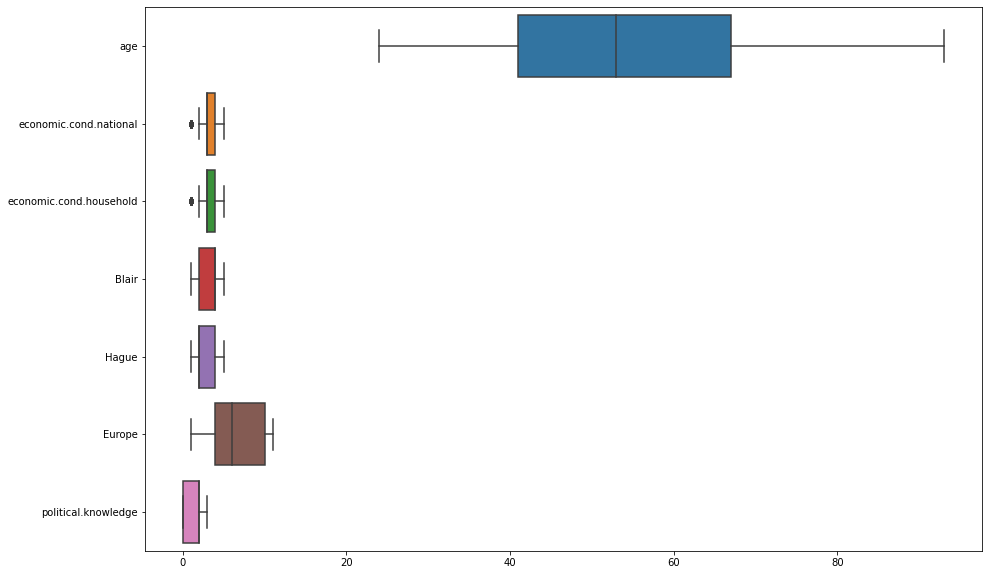

In [27]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=df,orient="h")
plt.show()

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
dtypes=df.dtypes[(df.dtypes!= 'object')].index
for column in df[dtypes].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

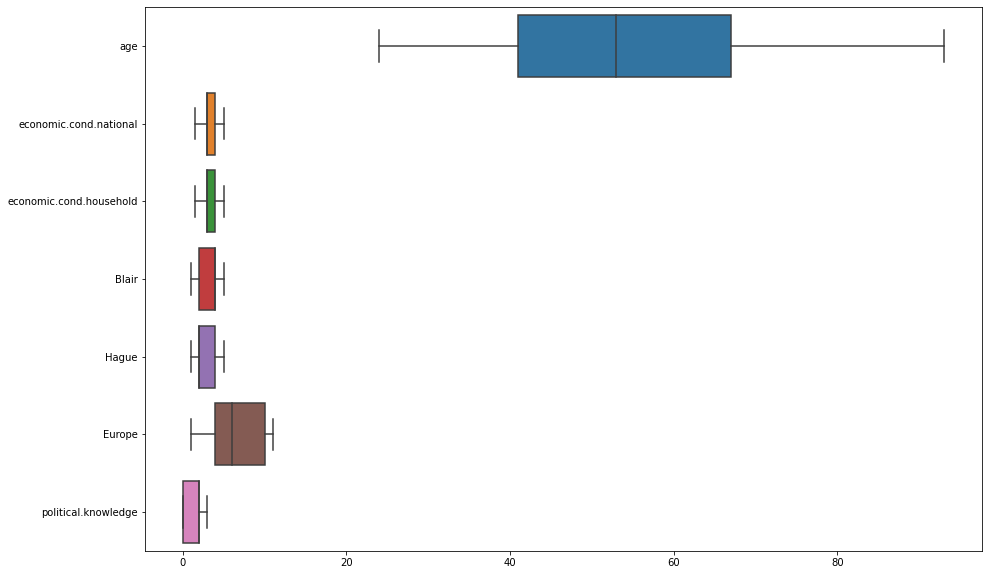

In [30]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=df,orient="h")
plt.show()

### Encoding categorical variables

In [31]:
cat=["vote", "gender"]

In [32]:
df1=df.copy(deep=True)

In [33]:
df1 =pd.get_dummies(df1, columns=cat,drop_first=True)

In [34]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


### Train-Test-Split

In [35]:
df1.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [36]:
# Copy all the predictor variables into X dataframe
X = df1.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. Target variable is converted in to Log. 
y = df1['vote_Labour']

In [37]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


In [38]:
X.shape

(1517, 8)

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

In [40]:
y.value_counts(normalize=True)

1    0.69677
0    0.30323
Name: vote_Labour, dtype: float64

In [41]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

### Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
# Fit the Logistic Regression model
model_lr=LogisticRegression(random_state=1)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Predicting on train and test datasets

In [43]:
ytrain_predict_lr = model_lr.predict(X_train)
ytest_predict_lr = model_lr.predict(X_test)

#### Getting predicted classes and probabilities

In [44]:
ytest_predict_lr_prob = model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_lr_prob).head()

,0,1
0,0.426584,0.573416
1,0.154447,0.845553
2,0.006791,0.993209
3,0.838998,0.161002
4,0.065151,0.934849


#### Accuracy on training set

In [45]:
# Accuracy - Training Data
logistic_train_acc = model_lr.score(X_train, y_train)
logistic_train_acc

0.8341187558906692

#### Accuracy on test set

In [46]:
# Accuracy - Test Data
logistic_test_acc = model_lr.score(X_test, y_test)
logistic_test_acc

0.831140350877193

#### AUC and ROC for the training data

AUC: 0.890


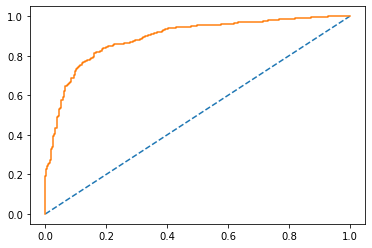

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# predict probabilities
probs_lr_train = model_lr.predict_proba(X_train)
# keep probabilities for Labour party only
probs_lr_train_labour = probs_lr_train[:, 1]
# calculate AUC
auc_lr_train = roc_auc_score(y_train, probs_lr_train_labour)
print('AUC: %.3f' % auc_lr_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.883


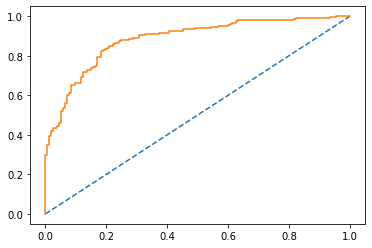

In [48]:
# predict probabilities
probs_lr_test = model_lr.predict_proba(X_test)
# keep probabilities for Labour party only
probs_lr_test = probs_lr_test[:, 1]
# calculate AUC
auc_lr_test = roc_auc_score(y_test, probs_lr_test)
print('AUC: %.3f' % auc_lr_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lr_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [49]:
confusion_matrix(y_train, ytrain_predict_lr)

array([[197, 110],
       [ 66, 688]], dtype=int64)

In [50]:
print(classification_report(y_train, ytrain_predict_lr))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [51]:
logistic_metrics=classification_report(y_train, ytrain_predict_lr,output_dict=True)
df99=pd.DataFrame(logistic_metrics).transpose()
labour_precision_train_lr=round(df99.loc["1"][0],2)
labour_recall_train_lr=round(df99.loc["1"][1],2)
labour_f1_train_lr=round(df99.loc["1"][2],2)
conservative_precision_train_lr=round(df99.loc["0"][0],2)
conservative_recall_train_lr=round(df99.loc["0"][1],2)
conservative_f1_train_lr=round(df99.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_lr)
print ('labour_train_recall ',labour_recall_train_lr)
print ('labour_train_f1 ',labour_f1_train_lr)
print ('conservative_train_precision ',conservative_precision_train_lr)
print ('conservative_train_recall ',conservative_recall_train_lr)
print ('conservative_train_f1 ',conservative_f1_train_lr)

labour_train_precision  0.86
labour_train_recall  0.91
labour_train_f1  0.89
conservative_train_precision  0.75
conservative_train_recall  0.64
conservative_train_f1  0.69


#### Confusion matrix for test data

In [52]:
confusion_matrix(y_test, ytest_predict_lr)

array([[112,  41],
       [ 36, 267]], dtype=int64)

In [53]:
print(classification_report(y_test, ytest_predict_lr))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



In [54]:
logistic_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df98=pd.DataFrame(logistic_metrics).transpose()
labour_precision_test_lr=round(df98.loc["1"][0],2)
labour_recall_test_lr=round(df98.loc["1"][1],2)
labour_f1_test_lr=round(df98.loc["1"][2],2)
conservative_precision_test_lr=round(df98.loc["0"][0],2)
conservative_recall_test_lr=round(df98.loc["0"][1],2)
conservative_f1_test_lr=round(df98.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_lr)
print ('labour_test_recall ',labour_recall_test_lr)
print ('labour_test_f1 ',labour_f1_test_lr)
print ('conservative_test_precision ',conservative_precision_test_lr)
print ('conservative_test_recall ',conservative_recall_test_lr)
print ('conservative_test_f1 ',conservative_f1_test_lr)

labour_test_precision  0.87
labour_test_recall  0.88
labour_test_f1  0.87
conservative_test_precision  0.76
conservative_test_recall  0.73
conservative_test_f1  0.74


### LDA Model

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Build LDA Model and fit the data
clf=LinearDiscriminantAnalysis()
model_lda = clf.fit(X_train, y_train)
model_lda

LinearDiscriminantAnalysis()

#### Predicting on train and test datasets

In [56]:
ytrain_predict_lda = model_lda.predict(X_train)
ytest_predict_lda = model_lda.predict(X_test)

#### Getting predicted classes and probabilities

In [57]:
ytest_predict_lda_prob = model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_lda_prob).head()

,0,1
0,0.465970,0.534030
1,0.137501,0.862499
2,0.005997,0.994003
3,0.866101,0.133899
4,0.053663,0.946337


#### Accuracy on training set

In [58]:
# Accuracy - Test Data
lda_train_acc = model_lda.score(X_train, y_train)
lda_train_acc

0.8341187558906692

#### Accuracy on test set

In [59]:
# Accuracy - Test Data
lda_test_acc = model_lda.score(X_test, y_test)
lda_test_acc

0.831140350877193

#### AUC and ROC for the training data

AUC: 0.890


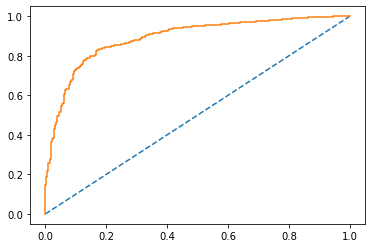

In [60]:
# predict probabilities
probs_lda_train = model_lda.predict_proba(X_train)
# keep probabilities for Labour party only
probs_lda_train_labour = probs_lda_train[:, 1]
# calculate AUC
auc_lda_train = roc_auc_score(y_train, probs_lda_train_labour)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lda_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.888


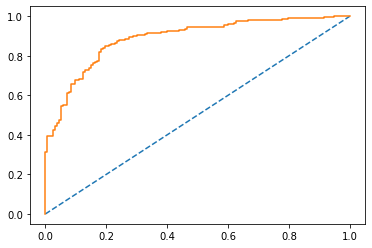

In [61]:
# predict probabilities
probs_lda_test = model_lda.predict_proba(X_test)
# keep probabilities for Labour party only
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
auc_lda_test = roc_auc_score(y_test, probs_lda_test)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [62]:
confusion_matrix(y_train, ytrain_predict_lda)

array([[200, 107],
       [ 69, 685]], dtype=int64)

In [63]:
print(classification_report(y_train, ytrain_predict_lda))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [64]:
lda_metrics_train=classification_report(y_train, ytrain_predict_lda,output_dict=True)
df97=pd.DataFrame(lda_metrics_train).transpose()
labour_precision_train_lda=round(df97.loc["1"][0],2)
labour_recall_train_lda=round(df97.loc["1"][1],2)
labour_f1_train_lda=round(df97.loc["1"][2],2)
conservative_precision_train_lda=round(df97.loc["0"][0],2)
conservative_recall_train_lda=round(df97.loc["0"][1],2)
conservative_f1_train_lda=round(df97.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_lda)
print ('labour_train_recall ',labour_recall_train_lda)
print ('labour_train_f1 ',labour_f1_train_lda)
print ('conservative_train_precision ',conservative_precision_train_lda)
print ('conservative_train_recall ',conservative_recall_train_lda)
print ('conservative_train_f1 ',conservative_f1_train_lda)

labour_train_precision  0.86
labour_train_recall  0.91
labour_train_f1  0.89
conservative_train_precision  0.74
conservative_train_recall  0.65
conservative_train_f1  0.69


#### Confusion matrix for test data

In [65]:
confusion_matrix(y_test, ytest_predict_lda)

array([[111,  42],
       [ 35, 268]], dtype=int64)

In [66]:
print(classification_report(y_test, ytest_predict_lda))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [67]:
lda_metrics_test=classification_report(y_test, ytest_predict_lda,output_dict=True)
df96=pd.DataFrame(lda_metrics_test).transpose()
labour_precision_test_lda=round(df96.loc["1"][0],2)
labour_recall_test_lda=round(df96.loc["1"][1],2)
labour_f1_test_lda=round(df96.loc["1"][2],2)
conservative_precision_test_lda=round(df96.loc["0"][0],2)
conservative_recall_test_lda=round(df96.loc["0"][1],2)
conservative_f1_test_lda=round(df96.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_lda)
print ('labour_test_recall ',labour_recall_test_lda)
print ('labour_test_f1 ',labour_f1_test_lda)
print ('conservative_test_precision ',conservative_precision_test_lda)
print ('conservative_test_recall ',conservative_recall_test_lda)
print ('conservative_test_f1 ',conservative_f1_test_lda)

labour_test_precision  0.86
labour_test_recall  0.88
labour_test_f1  0.87
conservative_test_precision  0.76
conservative_test_recall  0.73
conservative_test_f1  0.74


### KNN Model

In [68]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting on train and test datasets

In [69]:
ytrain_predict_knn = KNN_model.predict(X_train)
ytest_predict_knn = KNN_model.predict(X_test)

#### Getting predicted classes and probabilities

In [70]:
ytest_predict_knn_prob = KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_knn_prob).head()

,0,1
0,0.6,0.4
1,0.4,0.6
2,0.2,0.8
3,0.4,0.6
4,0.0,1.0


#### Accuracy on training set

In [71]:
# Accuracy - Test Data
knn_train_acc = KNN_model.score(X_train, y_train)
knn_train_acc

0.8576814326107446

#### Accuracy on test set

In [72]:
# Accuracy - Test Data
knn_test_acc = KNN_model.score(X_test, y_test)
knn_test_acc

0.8223684210526315

#### AUC and ROC for the training data

AUC: 0.926


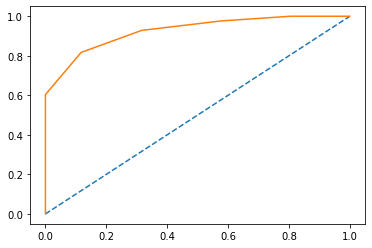

In [73]:
# predict probabilities
probs_knn_train = KNN_model.predict_proba(X_train)
# keep probabilities for Labour party only
probs_knn_train_labour = probs_knn_train[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(y_train, probs_knn_train_labour)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_knn_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.861


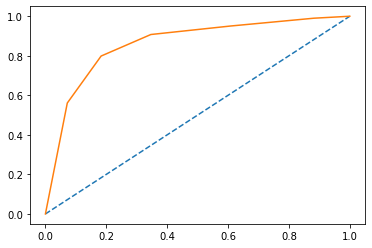

In [74]:
# predict probabilities
probs_knn_test = KNN_model.predict_proba(X_test)
# keep probabilities for Labour party only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(y_test, probs_knn_test)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [75]:
confusion_matrix(y_train, ytrain_predict_knn)

array([[210,  97],
       [ 54, 700]], dtype=int64)

In [76]:
print(classification_report(y_train, ytrain_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [77]:
knn_metrics_train=classification_report(y_train, ytrain_predict_knn,output_dict=True)
df95=pd.DataFrame(knn_metrics_train).transpose()
labour_precision_train_knn=round(df95.loc["1"][0],2)
labour_recall_train_knn=round(df95.loc["1"][1],2)
labour_f1_train_knn=round(df95.loc["1"][2],2)
conservative_precision_train_knn=round(df95.loc["0"][0],2)
conservative_recall_train_knn=round(df95.loc["0"][1],2)
conservative_f1_train_knn=round(df95.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_knn)
print ('labour_train_recall ',labour_recall_train_knn)
print ('labour_train_f1 ',labour_f1_train_knn)
print ('conservative_train_precision ',conservative_precision_train_knn)
print ('conservative_train_recall ',conservative_recall_train_knn)
print ('conservative_train_f1 ',conservative_f1_train_knn)

labour_train_precision  0.88
labour_train_recall  0.93
labour_train_f1  0.9
conservative_train_precision  0.8
conservative_train_recall  0.68
conservative_train_f1  0.74


#### Confusion matrix for test data

In [78]:
confusion_matrix(y_test, ytest_predict_knn)

array([[100,  53],
       [ 28, 275]], dtype=int64)

In [79]:
print(classification_report(y_test, ytest_predict_knn))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [80]:
knn_metrics_test=classification_report(y_test, ytest_predict_knn,output_dict=True)
df94=pd.DataFrame(knn_metrics_test).transpose()
labour_precision_test_knn=round(df94.loc["1"][0],2)
labour_recall_test_knn=round(df94.loc["1"][1],2)
labour_f1_test_knn=round(df94.loc["1"][2],2)
conservative_precision_test_knn=round(df94.loc["0"][0],2)
conservative_recall_test_knn=round(df94.loc["0"][1],2)
conservative_f1_test_knn=round(df94.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_knn)
print ('labour_test_recall ',labour_recall_test_knn)
print ('labour_test_f1 ',labour_f1_test_knn)
print ('conservative_test_precision ',conservative_precision_test_knn)
print ('conservative_test_recall ',conservative_recall_test_knn)
print ('conservative_test_f1 ',conservative_f1_test_knn)

labour_test_precision  0.84
labour_test_recall  0.91
labour_test_f1  0.87
conservative_test_precision  0.78
conservative_test_recall  0.65
conservative_test_f1  0.71


### NAIVE BAYES Model

In [81]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

#### Predicting on train and test datasets

In [82]:
ytrain_predict_nb = NB_model.predict(X_train)
ytest_predict_nb = NB_model.predict(X_test)

#### Getting predicted classes and probabilities

In [83]:
ytest_predict_nb_prob = NB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_nb_prob).head()

,0,1
0,0.553915,0.446085
1,0.131740,0.868260
2,0.000247,0.999753
3,0.947290,0.052710
4,0.030269,0.969731


#### Accuracy on training set

In [84]:
# Accuracy - Train Data
nb_train_acc = NB_model.score(X_train, y_train)
nb_train_acc

0.8341187558906692

#### Accuracy on test set

In [85]:
# Accuracy - Test Data
nb_test_acc = NB_model.score(X_test, y_test)
nb_test_acc

0.8223684210526315

#### AUC and ROC for the training data

AUC: 0.889


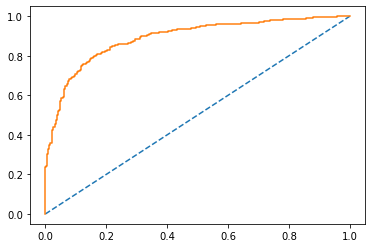

In [86]:
# predict probabilities
probs_nb_train = NB_model.predict_proba(X_train)
# keep probabilities for Labour party only
probs_nb_train_labour = probs_nb_train[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(y_train, probs_nb_train_labour)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_nb_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.876


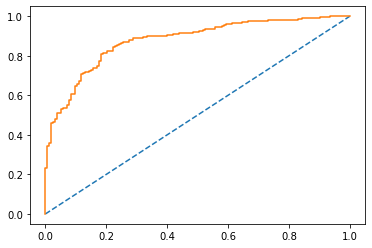

In [87]:
# predict probabilities
probs_nb_test = NB_model.predict_proba(X_test)
# keep probabilities for Labour party only
probs_nb_test = probs_nb_test[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(y_test, probs_nb_test)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_nb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [88]:
confusion_matrix(y_train, ytrain_predict_nb)

array([[212,  95],
       [ 81, 673]], dtype=int64)

In [89]:
print(classification_report(y_train, ytrain_predict_nb))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [90]:
nb_metrics_train=classification_report(y_train, ytrain_predict_nb,output_dict=True)
df93=pd.DataFrame(nb_metrics_train).transpose()
labour_precision_train_nb=round(df93.loc["1"][0],2)
labour_recall_train_nb=round(df93.loc["1"][1],2)
labour_f1_train_nb=round(df93.loc["1"][2],2)
conservative_precision_train_nb=round(df93.loc["0"][0],2)
conservative_recall_train_nb=round(df93.loc["0"][1],2)
conservative_f1_train_nb=round(df93.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_nb)
print ('labour_train_recall ',labour_recall_train_nb)
print ('labour_train_f1 ',labour_f1_train_nb)
print ('conservative_train_precision ',conservative_precision_train_nb)
print ('conservative_train_recall ',conservative_recall_train_nb)
print ('conservative_train_f1 ',conservative_f1_train_nb)

labour_train_precision  0.88
labour_train_recall  0.89
labour_train_f1  0.88
conservative_train_precision  0.72
conservative_train_recall  0.69
conservative_train_f1  0.71


#### Confusion matrix for test data

In [91]:
confusion_matrix(y_test, ytest_predict_nb)

array([[112,  41],
       [ 40, 263]], dtype=int64)

In [92]:
print(classification_report(y_test, ytest_predict_nb))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [93]:
nb_metrics_test=classification_report(y_test, ytest_predict_nb,output_dict=True)
df92=pd.DataFrame(nb_metrics_test).transpose()
labour_precision_test_nb=round(df92.loc["1"][0],2)
labour_recall_test_nb=round(df92.loc["1"][1],2)
labour_f1_test_nb=round(df92.loc["1"][2],2)
conservative_precision_test_nb=round(df92.loc["0"][0],2)
conservative_recall_test_nb=round(df92.loc["0"][1],2)
conservative_f1_test_nb=round(df92.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_nb)
print ('labour_test_recall ',labour_recall_test_nb)
print ('labour_test_f1 ',labour_f1_test_nb)
print ('conservative_test_precision ',conservative_precision_test_nb)
print ('conservative_test_recall ',conservative_recall_test_nb)
print ('conservative_test_f1 ',conservative_f1_test_nb)

labour_test_precision  0.87
labour_test_recall  0.87
labour_test_f1  0.87
conservative_test_precision  0.74
conservative_test_recall  0.73
conservative_test_f1  0.73


#### Bagging

In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
Bagging_model = BaggingClassifier(base_estimator=RF_model, n_estimators=100, random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

#### Predicting on train and test datasets

In [95]:
ytrain_predict_rf = Bagging_model.predict(X_train)
ytest_predict_rf = Bagging_model.predict(X_test)

#### Getting predicted classes and probabilities

In [96]:
ytest_predict_rf_prob = Bagging_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_rf_prob).head()

,0,1
0,0.6813,0.3187
1,0.2965,0.7035
2,0.0410,0.9590
3,0.7510,0.2490
4,0.1168,0.8832


#### Accuracy on training set

In [97]:
# Accuracy - Train Data
rf_train_acc = Bagging_model.score(X_train, y_train)
rf_train_acc

0.9679547596606974

#### Accuracy on test set

In [98]:
# Accuracy - Test Data
rf_test_acc = Bagging_model.score(X_test, y_test)
rf_test_acc

0.8289473684210527

#### AUC and ROC for the training data

AUC: 0.997


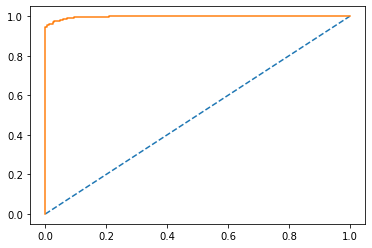

In [99]:
# predict probabilities
probs_rf_train = Bagging_model.predict_proba(X_train)
# keep probabilities for Labour party only
probs_rf_train_labour = probs_rf_train[:, 1]
# calculate AUC
auc_rf_train = roc_auc_score(y_train, probs_rf_train_labour)
print('AUC: %.3f' % auc_rf_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_rf_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.897


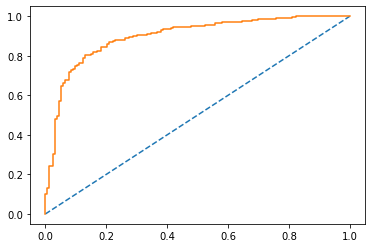

In [100]:
# predict probabilities
probs_rf_test = Bagging_model.predict_proba(X_test)
# keep probabilities for Labour party only
probs_rf_test = probs_rf_test[:, 1]
# calculate AUC
auc_rf_test = roc_auc_score(y_test, probs_rf_test)
print('AUC: %.3f' % auc_rf_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_rf_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [101]:
confusion_matrix(y_train, ytrain_predict_rf)

array([[277,  30],
       [  4, 750]], dtype=int64)

In [102]:
print(classification_report(y_train, ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [103]:
rf_metrics_train=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df89=pd.DataFrame(rf_metrics_train).transpose()
labour_precision_train_rf=round(df89.loc["1"][0],2)
labour_recall_train_rf=round(df89.loc["1"][1],2)
labour_f1_train_rf=round(df89.loc["1"][2],2)
conservative_precision_train_rf=round(df89.loc["0"][0],2)
conservative_recall_train_rf=round(df89.loc["0"][1],2)
conservative_f1_train_rf=round(df89.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_rf)
print ('labour_train_recall ',labour_recall_train_rf)
print ('labour_train_f1 ',labour_f1_train_rf)
print ('conservative_train_precision ',conservative_precision_train_rf)
print ('conservative_train_recall ',conservative_recall_train_rf)
print ('conservative_train_f1 ',conservative_f1_train_rf)

labour_train_precision  0.96
labour_train_recall  0.99
labour_train_f1  0.98
conservative_train_precision  0.99
conservative_train_recall  0.9
conservative_train_f1  0.94


#### Confusion matrix for test data

In [104]:
confusion_matrix(y_test, ytest_predict_rf)

array([[104,  49],
       [ 29, 274]], dtype=int64)

In [105]:
print(classification_report(y_test, ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [106]:
rf_metrics_test=classification_report(y_test, ytest_predict_rf,output_dict=True)
df88=pd.DataFrame(rf_metrics_test).transpose()
labour_precision_test_rf=round(df88.loc["1"][0],2)
labour_recall_test_rf=round(df88.loc["1"][1],2)
labour_f1_test_rf=round(df88.loc["1"][2],2)
conservative_precision_test_rf=round(df88.loc["0"][0],2)
conservative_recall_test_rf=round(df88.loc["0"][1],2)
conservative_f1_test_rf=round(df88.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_rf)
print ('labour_test_recall ',labour_recall_test_rf)
print ('labour_test_f1 ',labour_f1_test_rf)
print ('conservative_test_precision ',conservative_precision_test_rf)
print ('conservative_test_recall ',conservative_recall_test_rf)
print ('conservative_test_f1 ',conservative_f1_test_rf)

labour_test_precision  0.85
labour_test_recall  0.9
labour_test_f1  0.88
conservative_test_precision  0.78
conservative_test_recall  0.68
conservative_test_f1  0.73


##### ADA Boosting

In [107]:
ADA_model = AdaBoostClassifier(random_state=1, learning_rate=0.01)
ADA_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, random_state=1)

#### Predicting on train and test datasets

In [108]:
ytrain_predict_ADA = ADA_model.predict(X_train)
ytest_predict_ADA = ADA_model.predict(X_test)

#### Getting predicted classes and probabilities

In [109]:
ytest_predict_ADA_prob = ADA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_ADA_prob).head()

,0,1
0,0.326483,0.673517
1,0.211437,0.788563
2,0.169235,0.830765
3,0.548865,0.451135
4,0.402257,0.597743


#### Accuracy on training set

In [110]:
# Accuracy - Train Data
ADA_train_acc = ADA_model.score(X_train, y_train)
ADA_train_acc

0.7945334590009425

#### Accuracy on test set

In [111]:
# Accuracy - Test Data
ADA_test_acc = ADA_model.score(X_test, y_test)
ADA_test_acc

0.7785087719298246

#### AUC and ROC for the training data

AUC: 0.846


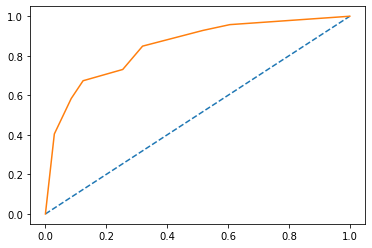

In [112]:
# predict probabilities
probs_ADA_train = ADA_model.predict_proba(X_train)
# keep probabilities for Labour party only
probs_ADA_train_labour = probs_ADA_train[:, 1]
# calculate AUC
auc_ADA_train = roc_auc_score(y_train, probs_ADA_train_labour)
print('AUC: %.3f' % auc_ADA_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_ADA_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.850


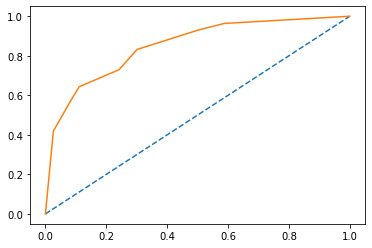

In [113]:
# predict probabilities
probs_ADA_test = ADA_model.predict_proba(X_test)
# keep probabilities for Labour party only
probs_ADA_test = probs_ADA_test[:, 1]
# calculate AUC
auc_ADA_test = roc_auc_score(y_test, probs_ADA_test)
print('AUC: %.3f' % auc_ADA_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_ADA_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [114]:
confusion_matrix(y_train, ytrain_predict_ADA)

array([[121, 186],
       [ 32, 722]], dtype=int64)

In [115]:
print(classification_report(y_train, ytrain_predict_ADA))

              precision    recall  f1-score   support

           0       0.79      0.39      0.53       307
           1       0.80      0.96      0.87       754

    accuracy                           0.79      1061
   macro avg       0.79      0.68      0.70      1061
weighted avg       0.79      0.79      0.77      1061



In [116]:
ADA_metrics_train=classification_report(y_train, ytrain_predict_ADA,output_dict=True)
df88=pd.DataFrame(ADA_metrics_train).transpose()
labour_precision_train_ADA=round(df88.loc["1"][0],2)
labour_recall_train_ADA=round(df88.loc["1"][1],2)
labour_f1_train_ADA=round(df88.loc["1"][2],2)
conservative_precision_train_ADA=round(df88.loc["0"][0],2)
conservative_recall_train_ADA=round(df88.loc["0"][1],2)
conservative_f1_train_ADA=round(df88.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_ADA)
print ('labour_train_recall ',labour_recall_train_ADA)
print ('labour_train_f1 ',labour_f1_train_ADA)
print ('conservative_train_precision ',conservative_precision_train_ADA)
print ('conservative_train_recall ',conservative_recall_train_ADA)
print ('conservative_train_f1 ',conservative_f1_train_ADA)

labour_train_precision  0.8
labour_train_recall  0.96
labour_train_f1  0.87
conservative_train_precision  0.79
conservative_train_recall  0.39
conservative_train_f1  0.53


#### Confusion matrix for test data

In [117]:
confusion_matrix(y_test, ytest_predict_ADA)

array([[ 63,  90],
       [ 11, 292]], dtype=int64)

In [118]:
print(classification_report(y_test, ytest_predict_ADA))

              precision    recall  f1-score   support

           0       0.85      0.41      0.56       153
           1       0.76      0.96      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.69      0.70       456
weighted avg       0.79      0.78      0.75       456



In [119]:
ADA_metrics_test=classification_report(y_test, ytest_predict_ADA,output_dict=True)
df87=pd.DataFrame(ADA_metrics_test).transpose()
labour_precision_test_ADA=round(df87.loc["1"][0],2)
labour_recall_test_ADA=round(df87.loc["1"][1],2)
labour_f1_test_ADA=round(df87.loc["1"][2],2)
conservative_precision_test_ADA=round(df87.loc["0"][0],2)
conservative_recall_test_ADA=round(df87.loc["0"][1],2)
conservative_f1_test_ADA=round(df87.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_ADA)
print ('labour_test_recall ',labour_recall_test_ADA)
print ('labour_test_f1 ',labour_f1_test_ADA)
print ('conservative_test_precision ',conservative_precision_test_ADA)
print ('conservative_test_recall ',conservative_recall_test_ADA)
print ('conservative_test_f1 ',conservative_f1_test_ADA)

labour_test_precision  0.76
labour_test_recall  0.96
labour_test_f1  0.85
conservative_test_precision  0.85
conservative_test_recall  0.41
conservative_test_f1  0.56


##### Gradient Boosting

In [120]:
Grad_model = GradientBoostingClassifier(random_state=1, learning_rate=0.01)
Grad_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

#### Predicting on train and test datasets

In [121]:
ytrain_predict_Grad = Grad_model.predict(X_train)
ytest_predict_Grad = Grad_model.predict(X_test)

#### Getting predicted classes and probabilities

In [122]:
ytest_predict_Grad_prob = Grad_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_Grad_prob).head()

,0,1
0,0.436500,0.563500
1,0.214270,0.785730
2,0.132554,0.867446
3,0.631086,0.368914
4,0.319530,0.680470


#### Accuracy on training set

In [123]:
# Accuracy - Train Data
Grad_train_acc = Grad_model.score(X_train, y_train)
Grad_train_acc

0.8114985862393967

#### Accuracy on test set

In [124]:
# Accuracy - Test Data
Grad_test_acc = Grad_model.score(X_test, y_test)
Grad_test_acc

0.7872807017543859

#### AUC and ROC for the training data

AUC: 0.903


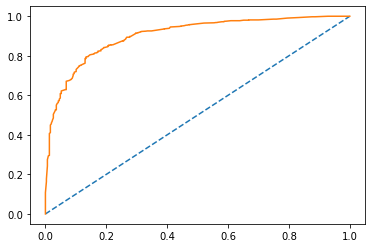

In [125]:
# predict probabilities
probs_Grad_train = Grad_model.predict_proba(X_train)
# keep probabilities for Labour party only
probs_Grad_train_labour = probs_Grad_train[:, 1]
# calculate AUC
auc_Grad_train = roc_auc_score(y_train, probs_Grad_train_labour)
print('AUC: %.3f' % auc_Grad_train)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_Grad_train_labour)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

#### AUC and ROC for the test data

AUC: 0.890


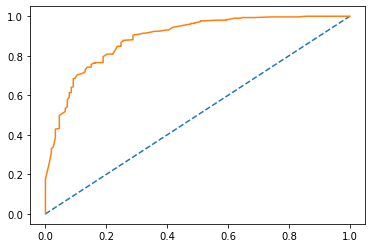

In [126]:
# predict probabilities
probs_Grad_test = Grad_model.predict_proba(X_test)
# keep probabilities for Labour party only
probs_Grad_test = probs_Grad_test[:, 1]
# calculate AUC
auc_Grad_test = roc_auc_score(y_test, probs_Grad_test)
print('AUC: %.3f' % auc_Grad_test)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_Grad_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

#### Confusion matrix for training data

In [127]:
confusion_matrix(y_train, ytrain_predict_Grad)

array([[126, 181],
       [ 19, 735]], dtype=int64)

In [128]:
print(classification_report(y_train, ytrain_predict_Grad))

              precision    recall  f1-score   support

           0       0.87      0.41      0.56       307
           1       0.80      0.97      0.88       754

    accuracy                           0.81      1061
   macro avg       0.84      0.69      0.72      1061
weighted avg       0.82      0.81      0.79      1061



In [129]:
Grad_metrics_train=classification_report(y_train, ytrain_predict_Grad,output_dict=True)
df88=pd.DataFrame(Grad_metrics_train).transpose()
labour_precision_train_Grad=round(df88.loc["1"][0],2)
labour_recall_train_Grad=round(df88.loc["1"][1],2)
labour_f1_train_Grad=round(df88.loc["1"][2],2)
conservative_precision_train_Grad=round(df88.loc["0"][0],2)
conservative_recall_train_Grad=round(df88.loc["0"][1],2)
conservative_f1_train_Grad=round(df88.loc["0"][2],2)
print ('labour_train_precision ',labour_precision_train_Grad)
print ('labour_train_recall ',labour_recall_train_Grad)
print ('labour_train_f1 ',labour_f1_train_Grad)
print ('conservative_train_precision ',conservative_precision_train_Grad)
print ('conservative_train_recall ',conservative_recall_train_Grad)
print ('conservative_train_f1 ',conservative_f1_train_Grad)

labour_train_precision  0.8
labour_train_recall  0.97
labour_train_f1  0.88
conservative_train_precision  0.87
conservative_train_recall  0.41
conservative_train_f1  0.56


#### Confusion matrix for test data

In [130]:
confusion_matrix(y_test, ytest_predict_Grad)

array([[ 61,  92],
       [  5, 298]], dtype=int64)

In [131]:
print(classification_report(y_test, ytest_predict_Grad))

              precision    recall  f1-score   support

           0       0.92      0.40      0.56       153
           1       0.76      0.98      0.86       303

    accuracy                           0.79       456
   macro avg       0.84      0.69      0.71       456
weighted avg       0.82      0.79      0.76       456



In [132]:
Grad_metrics_test=classification_report(y_test, ytest_predict_Grad,output_dict=True)
df87=pd.DataFrame(Grad_metrics_test).transpose()
labour_precision_test_Grad=round(df87.loc["1"][0],2)
labour_recall_test_Grad=round(df87.loc["1"][1],2)
labour_f1_test_Grad=round(df87.loc["1"][2],2)
conservative_precision_test_Grad=round(df87.loc["0"][0],2)
conservative_recall_test_Grad=round(df87.loc["0"][1],2)
conservative_f1_test_Grad=round(df87.loc["0"][2],2)
print ('labour_test_precision ',labour_precision_test_Grad)
print ('labour_test_recall ',labour_recall_test_Grad)
print ('labour_test_f1 ',labour_f1_test_Grad)
print ('conservative_test_precision ',conservative_precision_test_Grad)
print ('conservative_test_recall ',conservative_recall_test_Grad)
print ('conservative_test_f1 ',conservative_f1_test_Grad)

labour_test_precision  0.76
labour_test_recall  0.98
labour_test_f1  0.86
conservative_test_precision  0.92
conservative_test_recall  0.4
conservative_test_f1  0.56


#### Combined Model (Before Tuning)

In [133]:
index=['Accuracy', 'Recall','Precision','F1 Score']
Labour_Combined_model = pd.DataFrame({'Logistic Regression Train':[logistic_train_acc,labour_recall_train_lr, labour_precision_train_lr,labour_f1_train_lr],
       'Logistic Regression Test':[logistic_test_acc,labour_recall_test_lr,labour_precision_test_lr,labour_f1_test_lr],
       'LDA Train':[lda_train_acc,labour_recall_train_lda,labour_precision_train_lda,labour_f1_train_lda],
        'LDA Test':[lda_test_acc,labour_recall_test_lda,labour_precision_test_lda,labour_f1_test_lda],
        'KNN Train':[knn_train_acc,labour_recall_train_knn,labour_precision_train_knn,labour_f1_train_knn],
        'KNN Test':[knn_test_acc,labour_recall_test_knn,labour_precision_test_knn,labour_f1_test_knn],
        'NB Train':[nb_train_acc,labour_recall_train_nb,labour_precision_train_nb,labour_f1_train_nb],
        'NB Test':[nb_test_acc,labour_recall_test_nb,labour_precision_test_nb,labour_f1_test_nb],
        'Bagging Train':[rf_train_acc,labour_recall_train_rf,labour_precision_train_rf,labour_f1_train_rf],
        'Bagging Test':[rf_test_acc,labour_recall_test_rf,labour_precision_test_rf,labour_f1_test_rf],
        'ADA Boosting Train':[ADA_train_acc,labour_recall_train_ADA,labour_precision_train_ADA,labour_f1_train_ADA],
        'ADA Boosting Test':[ADA_test_acc,labour_recall_test_ADA,labour_precision_test_ADA,labour_f1_test_ADA],
        'Grad Boosting Train':[Grad_train_acc,labour_recall_train_Grad,labour_precision_train_Grad,labour_f1_train_Grad],
        'Grad Boosting Test':[Grad_test_acc,labour_recall_test_Grad,labour_precision_test_Grad,labour_f1_test_Grad]}, index=index)
    
round(Labour_Combined_model,2)

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,Bagging Train,Bagging Test,ADA Boosting Train,ADA Boosting Test,Grad Boosting Train,Grad Boosting Test
Accuracy,0.83,0.83,0.83,0.83,0.86,0.82,0.83,0.82,0.97,0.83,0.79,0.78,0.81,0.79
Recall,0.91,0.88,0.91,0.88,0.93,0.91,0.89,0.87,0.99,0.90,0.96,0.96,0.97,0.98
Precision,0.86,0.87,0.86,0.86,0.88,0.84,0.88,0.87,0.96,0.85,0.80,0.76,0.80,0.76
F1 Score,0.89,0.87,0.89,0.87,0.90,0.87,0.88,0.87,0.98,0.88,0.87,0.85,0.88,0.86


In [134]:
index=['Accuracy', 'Recall','Precision','F1 Score']
Cons_Combined_model = pd.DataFrame({'Logistic Regression Train':[logistic_train_acc,conservative_recall_train_lr, conservative_precision_train_lr,conservative_f1_train_lr],
       'Logistic Regression Test':[logistic_test_acc,conservative_recall_test_lr,conservative_precision_test_lr,conservative_f1_test_lr],
       'LDA Train':[lda_train_acc,conservative_recall_train_lda,conservative_precision_train_lda,conservative_f1_train_lda],
        'LDA Test':[lda_test_acc,conservative_recall_test_lda,conservative_precision_test_lda,conservative_f1_test_lda],
        'KNN Train':[knn_train_acc,conservative_recall_train_knn,conservative_precision_train_knn,conservative_f1_train_knn],
        'KNN Test':[knn_test_acc,conservative_recall_test_knn,conservative_precision_test_knn,conservative_f1_test_knn],
        'NB Train':[nb_train_acc,conservative_recall_train_nb,conservative_precision_train_nb,conservative_f1_train_nb],
        'NB Test':[nb_test_acc,conservative_recall_test_nb,conservative_precision_test_nb,conservative_f1_test_nb],
        'Bagging Train':[rf_train_acc,conservative_recall_train_rf,conservative_precision_train_rf,conservative_f1_train_rf],
        'Bagging Test':[rf_test_acc,conservative_recall_test_rf,conservative_precision_test_rf,conservative_f1_test_rf],
        'ADA Boosting Train':[ADA_train_acc,conservative_recall_train_ADA,conservative_precision_train_ADA,conservative_f1_train_ADA],
        'ADA Boosting Test':[ADA_test_acc,conservative_recall_test_ADA,conservative_precision_test_ADA,conservative_f1_test_ADA],
        'Grad Boosting Train':[Grad_train_acc,conservative_recall_train_Grad,conservative_precision_train_Grad,conservative_f1_train_Grad],
        'Grad Boosting Test':[Grad_test_acc,conservative_recall_test_Grad,conservative_precision_test_Grad,conservative_f1_test_Grad]}, index=index)
    
round(Cons_Combined_model,2)

,Logistic Regression Train,Logistic Regression Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,Bagging Train,Bagging Test,ADA Boosting Train,ADA Boosting Test,Grad Boosting Train,Grad Boosting Test
Accuracy,0.83,0.83,0.83,0.83,0.86,0.82,0.83,0.82,0.97,0.83,0.79,0.78,0.81,0.79
Recall,0.64,0.73,0.65,0.73,0.68,0.65,0.69,0.73,0.90,0.68,0.39,0.41,0.41,0.40
Precision,0.75,0.76,0.74,0.76,0.80,0.78,0.72,0.74,0.99,0.78,0.79,0.85,0.87,0.92
F1 Score,0.69,0.74,0.69,0.74,0.74,0.71,0.71,0.73,0.94,0.73,0.53,0.56,0.56,0.56


### Model Tuning

#### Logistic Regression Model

In [135]:
LR_grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs', 'liblinear'],
      'tol':[0.0001,0.00001]}

In [136]:
LR_grid_search = GridSearchCV(estimator = model_lr, param_grid = LR_grid, cv = 3,n_jobs=-1,scoring='f1')

In [137]:
LR_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [138]:
print(LR_grid_search.best_params_,'\n')
print(LR_grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(random_state=1)


In [139]:
LR_best_model = LR_grid_search.best_estimator_

In [140]:
ytrain_predict = LR_best_model.predict(X_train)
ytest_predict = LR_best_model.predict(X_test)

In [141]:
LR_best_model.score(X_train, y_train)

0.8341187558906692

In [142]:
LR_best_model.score(X_test, y_test)

0.831140350877193

In [143]:
print(metrics.confusion_matrix(y_train, ytrain_predict))

[[197 110]
 [ 66 688]]


In [144]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [145]:
print(metrics.confusion_matrix(y_test, ytest_predict))

[[112  41]
 [ 36 267]]


In [146]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.87      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.890


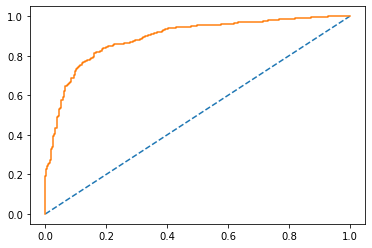

In [147]:
probs = LR_best_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.890


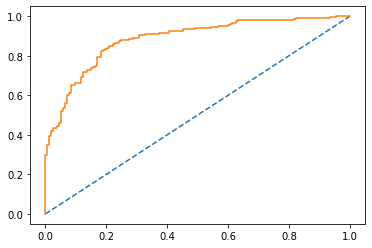

In [148]:
probs = LR_best_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

##### LDA

In [149]:
LDA_grid={'solver':['svd', 'lsqr', 'eigen']}

In [150]:
LDA_grid_search = GridSearchCV(estimator = model_lda, param_grid = LDA_grid, cv = 3,n_jobs=-1,scoring='f1')

In [151]:
LDA_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, scoring='f1')

In [152]:
print(LDA_grid_search.best_params_,'\n')
print(LDA_grid_search.best_estimator_)

{'solver': 'svd'} 

LinearDiscriminantAnalysis()


In [153]:
LDA_best_model = LDA_grid_search.best_estimator_

In [154]:
ytrain_predict = LDA_best_model.predict(X_train)
ytest_predict = LDA_best_model.predict(X_test)

In [155]:
LDA_best_model.score(X_train, y_train)

0.8341187558906692

In [156]:
LDA_best_model.score(X_test, y_test)

0.831140350877193

In [157]:
y_train_predict = LDA_best_model.predict(X_train)
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [158]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[200 107]
 [ 69 685]]


In [159]:
y_test_predict = LDA_best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [160]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[111  42]
 [ 35 268]]


AUC: 0.890


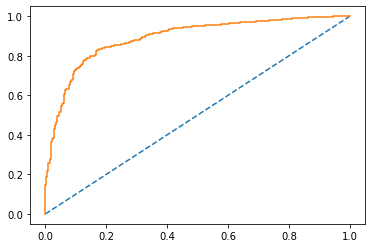

In [161]:
probs = LDA_best_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.890


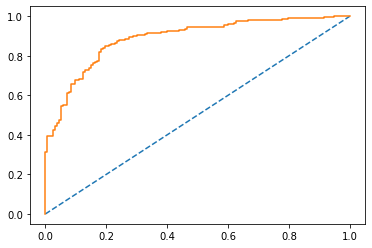

In [162]:
probs = LDA_best_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

##### Naive Bayes Model

In [163]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [164]:
NB_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [165]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

In [166]:
NB_grid_search = GridSearchCV(estimator = NB_model, param_grid = NB_grid, cv=cv_method, verbose=1, scoring='accuracy')

In [167]:
NB_grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [168]:
NB_best_model = NB_grid_search.best_estimator_

In [169]:
print(NB_grid_search.best_params_,'\n')
print(NB_grid_search.best_estimator_)

{'var_smoothing': 0.0003511191734215131} 

GaussianNB(var_smoothing=0.0003511191734215131)


In [170]:
NB_best_model.score(X_train, y_train)

0.8378887841658812

In [171]:
NB_best_model.score(X_test, y_test)

0.8267543859649122

In [172]:
y_train_predict = NB_best_model.predict(X_train)
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [173]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[212  95]
 [ 77 677]]


In [174]:
y_test_predict = NB_best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [175]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[113  40]
 [ 39 264]]


AUC: 0.889


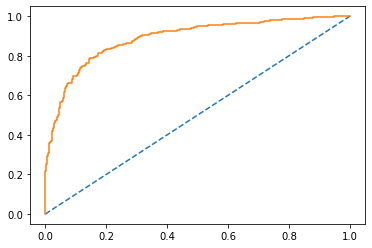

In [176]:
probs = NB_best_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.889


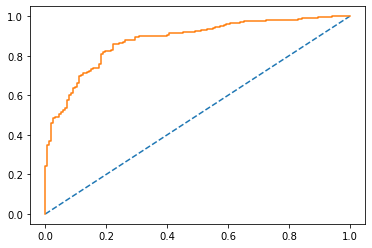

In [177]:
probs = NB_best_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

##### KNN

In [178]:
KNN_model.score(X_train, y_train)

0.8576814326107446

In [179]:
KNN_grid = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [180]:
KNN_grid_search = GridSearchCV(estimator = KNN_model, param_grid = KNN_grid,n_jobs=1)

In [181]:
KNN_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [182]:
KNN_best_model = KNN_grid_search.best_estimator_

In [183]:
print(KNN_grid_search.best_params_,'\n')
print(KNN_grid_search.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 5, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'} 

KNeighborsClassifier(leaf_size=5, n_jobs=-1, n_neighbors=9, weights='distance')


In [184]:
KNN_best_model.score(X_train, y_train)

1.0

In [185]:
KNN_best_model.score(X_test, y_test)

0.8092105263157895

In [186]:
y_train_predict = KNN_best_model.predict(X_train)
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [187]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[307   0]
 [  0 754]]


In [188]:
y_test_predict = KNN_best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.80       456



In [189]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[ 98  55]
 [ 32 271]]


AUC: 1.000


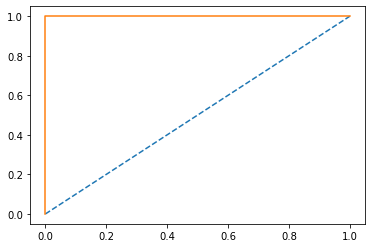

In [190]:
probs = KNN_best_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 1.000


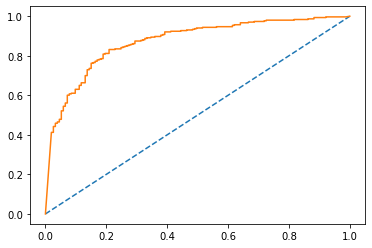

In [191]:
probs = KNN_best_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

### Problem 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
    
1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

#### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [192]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

##### Roosevelt

In [193]:
roosevelt = pd.read_csv (r'C:\Users\rohan\AppData\Roaming\nltk_data\corpora\inaugural\1941-Roosevelt.txt', sep='delimiter', names=["speech"])
roosevelt.to_csv ('Roosevelt.csv', index=None)
roosevelt.head()

,speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."


In [194]:
len(roosevelt['speech'])

38

In [195]:
roosevelt['word_count'] = roosevelt['speech'].apply(lambda x: len(str(x).split(" ")))
roosevelt[['speech','word_count']].head()

,speech,word_count
0,On each national day of inauguration since 178...,20
1,In Washington's day the task of the people was...,16
2,In Lincoln's day the task of the people was to...,17
3,In this day the task of the people is to save ...,20
4,"To us there has come a time, in the midst of s...",53


In [196]:
roosevelt['word_count'].sum()

1360

In [197]:
roosevelt['char_count'] = roosevelt['speech'].str.len()
roosevelt[['speech', 'char_count']].head()

,speech,char_count
0,On each national day of inauguration since 178...,120
1,In Washington's day the task of the people was...,84
2,In Lincoln's day the task of the people was to...,96
3,In this day the task of the people is to save ...,108
4,"To us there has come a time, in the midst of s...",248


In [198]:
roosevelt['char_count'].sum()

7496

In [199]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

roosevelt['avg_word'] = roosevelt['speech'].apply(lambda x: avg_word(x))
roosevelt[['speech', 'avg_word']].head()

,speech,avg_word
0,On each national day of inauguration since 178...,5.050000
1,In Washington's day the task of the people was...,4.312500
2,In Lincoln's day the task of the people was to...,4.705882
3,In this day the task of the people is to save ...,4.450000
4,"To us there has come a time, in the midst of s...",3.698113


##### Kennedy

In [200]:
kennedy = pd.read_csv (r'C:\Users\rohan\AppData\Roaming\nltk_data\corpora\inaugural\1961-Kennedy.txt', sep='delimiter', names=["speech"])
kennedy.to_csv ('Kennedy.csv', index=None)
kennedy.head()

,speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,The world is very different now. For man holds...
2,We dare not forget today that we are the heirs...
3,"Let every nation know, whether it wishes us we..."
4,This much we pledge -- and more.


In [201]:
len(kennedy['speech'])

27

In [202]:
kennedy['word_count'] = kennedy['speech'].apply(lambda x: len(str(x).split(" ")))
kennedy[['speech','word_count']].head()

,speech,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",73
1,The world is very different now. For man holds...,68
2,We dare not forget today that we are the heirs...,96
3,"Let every nation know, whether it wishes us we...",40
4,This much we pledge -- and more.,7


In [203]:
kennedy['word_count'].sum()

1390

In [204]:
kennedy['char_count'] = kennedy['speech'].str.len()
kennedy[['speech', 'char_count']].head()

,speech,char_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32


In [205]:
kennedy['char_count'].sum()

7565

In [206]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

kennedy['avg_word'] = kennedy['speech'].apply(lambda x: avg_word(x))
kennedy[['speech', 'avg_word']].head()

,speech,avg_word
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5.109589
1,The world is very different now. For man holds...,4.235294
2,We dare not forget today that we are the heirs...,4.343750
3,"Let every nation know, whether it wishes us we...",4.450000
4,This much we pledge -- and more.,3.714286


##### Nixon

In [207]:
nixon = pd.read_csv (r'C:\Users\rohan\AppData\Roaming\nltk_data\corpora\inaugural\1973-Nixon.txt', sep='delimiter', names=["speech"])
nixon.to_csv ('Nixon.csv', index=None)
nixon.head()

,speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"When we met here four years ago, America was b..."
2,"As we meet here today, we stand on the thresho..."
3,The central question before us is: How shall w...
4,Let us resolve that this will be what it can b...


In [208]:
len(nixon['speech'])

51

In [209]:
nixon['word_count'] = nixon['speech'].apply(lambda x: len(str(x).split(" ")))
nixon[['speech','word_count']].head()

,speech,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",25
1,"When we met here four years ago, America was b...",27
2,"As we meet here today, we stand on the thresho...",19
3,The central question before us is: How shall w...,51
4,Let us resolve that this will be what it can b...,38


In [210]:
nixon['word_count'].sum()

1819

In [211]:
nixon['char_count'] = nixon['speech'].str.len()
nixon[['speech', 'char_count']].head()

,speech,char_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",155
1,"When we met here four years ago, America was b...",156
2,"As we meet here today, we stand on the thresho...",84
3,The central question before us is: How shall w...,269
4,Let us resolve that this will be what it can b...,199


In [212]:
nixon['char_count'].sum()

9890

In [213]:
def avg_word(sentence):
    words = sentence.split()
    return(sum(len(word) for word in words)/len(words))

nixon['avg_word'] = nixon['speech'].apply(lambda x: avg_word(x))
nixon[['speech', 'avg_word']].head()

,speech,avg_word
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",5.240000
1,"When we met here four years ago, America was b...",4.814815
2,"As we meet here today, we stand on the thresho...",3.473684
3,The central question before us is: How shall w...,4.294118
4,Let us resolve that this will be what it can b...,4.263158


#### 2.2 Remove all the stopwords from all three speeches.

In [214]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

##### Roosevelt

In [216]:
roosevelt['stopwords'] = roosevelt['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))

roosevelt[['speech', 'stopwords']].head()

,speech,stopwords
0,On each national day of inauguration since 178...,8
1,In Washington's day the task of the people was...,7
2,In Lincoln's day the task of the people was to...,8
3,In this day the task of the people is to save ...,11
4,"To us there has come a time, in the midst of s...",28


In [217]:
roosevelt['stopwords'].sum()

632

In [218]:
roosevelt['speech'] = roosevelt['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
roosevelt['speech'].head()

0    On national day inauguration since 1789, peopl...
1    In Washington's day task people create weld to...
2    In Lincoln's day task people preserve Nation d...
3    In day task people save Nation institutions di...
4    To us come time, midst swift happenings, pause...
Name: speech, dtype: object

##### Kennedy

In [219]:
kennedy['stopwords'] = kennedy['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))

kennedy[['speech', 'stopwords']].head()

,speech,stopwords
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",22
1,The world is very different now. For man holds...,32
2,We dare not forget today that we are the heirs...,47
3,"Let every nation know, whether it wishes us we...",15
4,This much we pledge -- and more.,2


In [220]:
kennedy['stopwords'].sum()

618

In [221]:
kennedy['speech'] = kennedy['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
kennedy['speech'].head()

0    Vice President Johnson, Mr. Speaker, Mr. Chief...
1    The world different now. For man holds mortal ...
2    We dare forget today heirs first revolution. L...
3    Let every nation know, whether wishes us well ...
4                            This much pledge -- more.
Name: speech, dtype: object

##### Nixon

In [222]:
nixon['stopwords'] = nixon['speech'].apply(lambda x: len([x for x in x.split() if x in stop]))

nixon[['speech', 'stopwords']].head()

,speech,stopwords
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",6
1,"When we met here four years ago, America was b...",10
2,"As we meet here today, we stand on the thresho...",10
3,The central question before us is: How shall w...,23
4,Let us resolve that this will be what it can b...,21


In [223]:
nixon['stopwords'].sum()

899

In [224]:
nixon['speech'] = nixon['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
nixon['speech'].head()

0    Mr. Vice President, Mr. Speaker, Mr. Chief Jus...
1    When met four years ago, America bleak spirit,...
2    As meet today, stand threshold new era peace w...
3    The central question us is: How shall use peac...
4    Let us resolve become: time great responsibili...
Name: speech, dtype: object

#### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

##### Roosevelt

In [225]:
roosevelt['speech'] = roosevelt['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
roosevelt['speech'].head()

0    on national day inauguration since 1789, peopl...
1    in washington's day task people create weld to...
2    in lincoln's day task people preserve nation d...
3    in day task people save nation institutions di...
4    to us come time, midst swift happenings, pause...
Name: speech, dtype: object

In [226]:
roosevelt['speech'] = roosevelt['speech'].str.replace('[^\w\s]','')
roosevelt['speech'].head()

0    on national day inauguration since 1789 people...
1    in washingtons day task people create weld tog...
2    in lincolns day task people preserve nation di...
3    in day task people save nation institutions di...
4    to us come time midst swift happenings pause m...
Name: speech, dtype: object

In [227]:
freq1 = pd.Series(' '.join(roosevelt['speech']).split()).value_counts()[:30]
freq1.head(3)

it        13
nation    11
know      10
dtype: int64

##### Kennedy

In [228]:
kennedy['speech'] = kennedy['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
kennedy['speech'].head()

0    vice president johnson, mr. speaker, mr. chief...
1    the world different now. for man holds mortal ...
2    we dare forget today heirs first revolution. l...
3    let every nation know, whether wishes us well ...
4                            this much pledge -- more.
Name: speech, dtype: object

In [229]:
kennedy['speech'] = kennedy['speech'].str.replace('[^\w\s]','')
kennedy['speech'].head()

0    vice president johnson mr speaker mr chief jus...
1    the world different now for man holds mortal h...
2    we dare forget today heirs first revolution le...
3    let every nation know whether wishes us well i...
4                               this much pledge  more
Name: speech, dtype: object

In [230]:
freq2 = pd.Series(' '.join(kennedy['speech']).split()).value_counts()[:30]
freq2.head(3)

let      16
us       12
sides     8
dtype: int64

##### Nixon

In [231]:
nixon['speech'] = nixon['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
nixon['speech'].head()

0    mr. vice president, mr. speaker, mr. chief jus...
1    when met four years ago, america bleak spirit,...
2    as meet today, stand threshold new era peace w...
3    the central question us is: how shall use peac...
4    let us resolve become: time great responsibili...
Name: speech, dtype: object

In [232]:
nixon['speech'] = nixon['speech'].str.replace('[^\w\s]','')
nixon['speech'].head()

0    mr vice president mr speaker mr chief justice ...
1    when met four years ago america bleak spirit d...
2    as meet today stand threshold new era peace world
3    the central question us is how shall use peace...
4    let us resolve become time great responsibilit...
Name: speech, dtype: object

In [233]:
freq3 = pd.Series(' '.join(nixon['speech']).split()).value_counts()[:30]
freq3.head(3)

us       26
let      22
peace    19
dtype: int64

#### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

##### Roosevelt

In [234]:
roose = " ".join([str(i) for i in (roosevelt["speech"])])
roose

'on national day inauguration since 1789 people renewed sense dedication united states in washingtons day task people create weld together nation in lincolns day task people preserve nation disruption within in day task people save nation institutions disruption without to us come time midst swift happenings pause moment take stock  recall place history been rediscover may be if not risk real peril inaction lives nations determined count years lifetime human spirit the life man threescore years ten little more little less the life nation fullness measure live there men doubt this there men believe democracy form government frame life limited measured kind mystical artificial fate that unexplained reason tyranny slavery become surging wave future  freedom ebbing tide but americans know true eight years ago life republic seemed frozen fatalistic terror proved true we midst shock  acted we acted quickly boldly decisively these later years living years  fruitful years people democracy for 

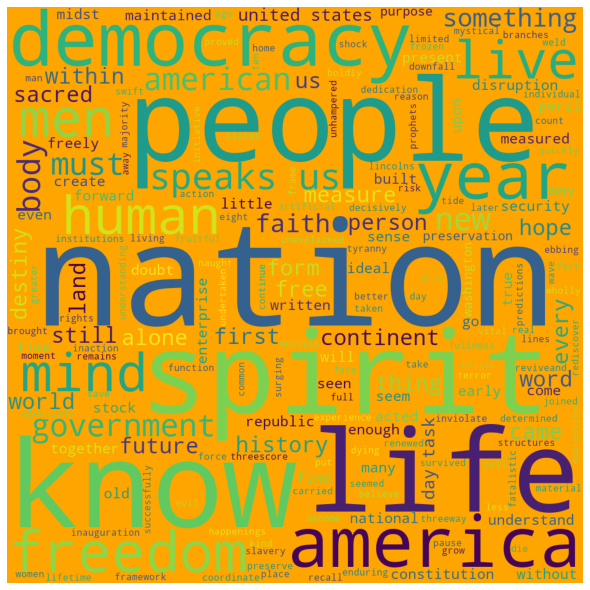

In [235]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='orange',
                min_font_size = 10).generate(roose) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##### Kennedy

In [236]:
ken = " ".join([str(i) for i in (kennedy["speech"])])
ken

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom  symbolizing end well beginning  signifying renewal well change for i sworn i almighty god solemn oath forebears l prescribed nearly century three quarters ago the world different now for man holds mortal hands power abolish forms human poverty forms human life and yet revolutionary beliefs forebears fought still issue around globe  belief rights man come generosity state hand god we dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans  born century tempered war disciplined hard bitter peace proud ancient heritage  unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend o

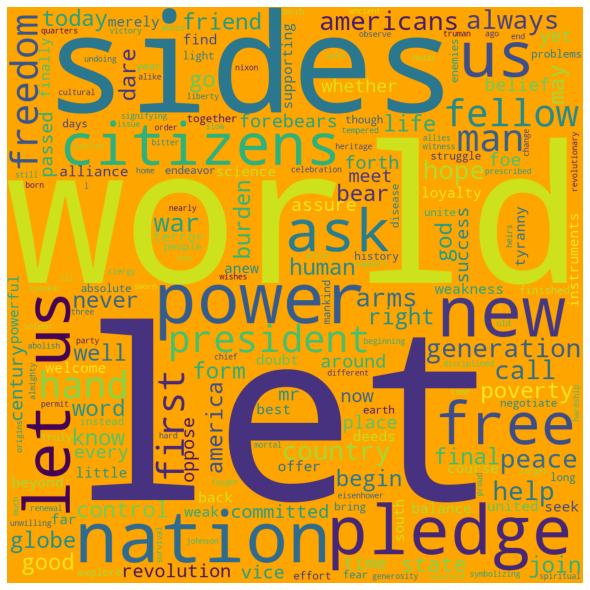

In [237]:
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='orange',
                min_font_size = 10).generate(ken) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##### Nixon

In [238]:
nix = " ".join([str(i) for i in (nixon["speech"])])
nix

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together when met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home as meet today stand threshold new era peace world the central question us is how shall use peace let us resolve era enter postwar periods often been time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation this past year saw farreaching results new policies peace by continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world because americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world the peace seek world flimsy peace merely interlude wars peace endure generations com

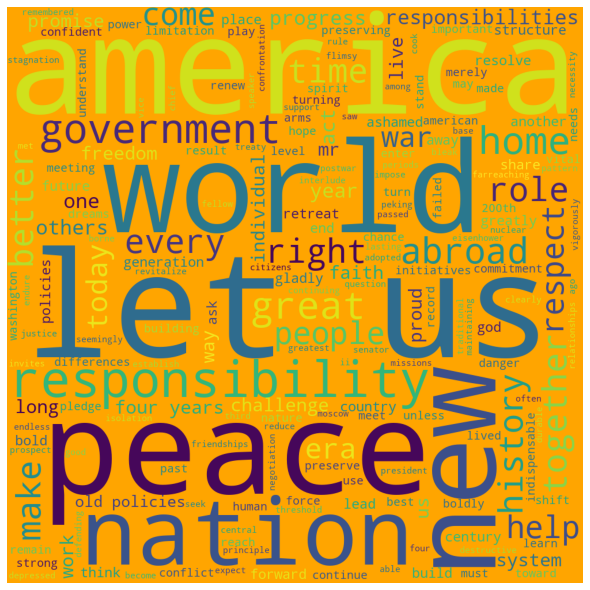

In [239]:
wordcloud = WordCloud(width = 1000, height = 1000, #wordcloud image creation
                background_color ='orange',
                min_font_size = 10).generate(nix) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()